In [2]:
import re    # for regular expressions 
import nltk  # for text manipulation 
import string 
import warnings 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt  
from wordcloud import WordCloud # data visualization library
#text features can be constructed using assorted techniques – Bag of Words, TF-IDF, and Word Embeddings.
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer #tfidf and Bag-of-Words Features.
import gensim # library for word2vec
%matplotlib inline
pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [3]:
train  = pd.read_csv('train_subset.csv') 
test = pd.read_csv('Happay_enterprise_reviews_test.csv')

In [4]:
train.shape

(15000, 2)

In [5]:
test.shape

(770, 5)

In [6]:
train['label']=train['label'].replace(to_replace=5,value=0)

In [7]:
train['label'].value_counts()

0    10000
1     5000
Name: label, dtype: int64

In [8]:
train.head()

,label,reviews
0,0,These stickers work like the review says they do. They stick on great and they stay on the phone. They are super stylish and I can share them with my sister. :)Really great product.
1,0,These are awesome and make my phone look so stylish! I have only used one so far and have had it on for almost a year! CAN YOU BELIEVE THAT! ONE YEAR!! Great quality!LOVE LOVE LOVE
2,0,"awesome! stays on, and looks great. can be used on multiple apple products. especially having nails, it helps to have an elevated key.leopard home button sticker for iphone 4s"
3,0,Came just as described.. It doesn't come unstuck and its cute! People ask where I got them from & it's great when driving.best thing ever..
4,0,"Good case, solid build. Protects phone all around with good access to buttons. Battery charges with full battery lasts me a full day. I usually leave my house around 7am and return at 10pm. I'm gl..."


In [9]:
test.head()

,reviewer_name,rating,review_date,upvote,reviews
0,dipakkumar nayak,4.0,May 5 2019,0.0,sometimes it don't work properly. ex : it shows the input amount twice in a monthly budget while I have inputed once & sometimes the selected expenses were not in the final expense sheet
1,Nishant Mamoria,1.0,March 13 2019,0.0,"not user friendly.... There are some entry during ""add expense"" option which are same for all expenses ( like details of project and donor) which should be selected by default after login. which a..."
2,Mustafa kiranawala,5.0,February 27 2019,2.0,There are a few bugs in the app but I got timely support from happay team. Rating is for Happay team.
3,rakesh chakilam,2.0,March 17 2019,1.0,This(Happay) card for name sake it is food card. but its not accepting at any merchant stores/sites like Swiggy Zomato Uber eats..etc please provide your services for that also.else its no use of...
4,SATHIYARAJAN p,5.0,April 20 2019,2.0,Easley to update on my business expenses with out delay as well asnot missed expenses


In [10]:
train[train['label']==0].head()

,label,reviews
0,0,These stickers work like the review says they do. They stick on great and they stay on the phone. They are super stylish and I can share them with my sister. :)Really great product.
1,0,These are awesome and make my phone look so stylish! I have only used one so far and have had it on for almost a year! CAN YOU BELIEVE THAT! ONE YEAR!! Great quality!LOVE LOVE LOVE
2,0,"awesome! stays on, and looks great. can be used on multiple apple products. especially having nails, it helps to have an elevated key.leopard home button sticker for iphone 4s"
3,0,Came just as described.. It doesn't come unstuck and its cute! People ask where I got them from & it's great when driving.best thing ever..
4,0,"Good case, solid build. Protects phone all around with good access to buttons. Battery charges with full battery lasts me a full day. I usually leave my house around 7am and return at 10pm. I'm gl..."


In [11]:
train[train['label']==1].head()

,label,reviews
10000,1,it worked for the first week then it only charge my phone to 20%. it is a waste of money.not a good Idea
10001,1,It worked great for the first couple of weeks then it just stopped completely.. so basically a small waste of money.Horrible
10002,1,"Only works one side at a time. When you connect two cables, one side stop working and also overheated burning the fuses. I purchased two of them and it's the same problem. Cheap and bad quality.do..."
10003,1,"I bought 2 of this and tried to test first ... after few minutes of charging, it felt hot. Pulled it out and the product smelled burnt. Tried the other one too and same thing. Be careful... this o..."
10004,1,"This case for some reason is peeling, there isn't much left of the orginal skin, i loved the case with pink being my favorite color but i wouldn't recommend this specific one for anyone.bad exper..."


In [12]:
train['label'].value_counts()

0    10000
1     5000
Name: label, dtype: int64

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


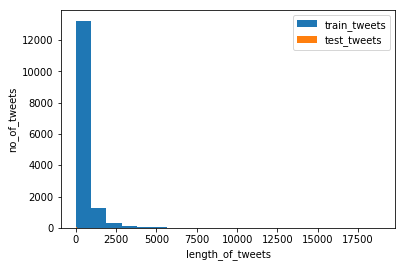

In [13]:
length_train=train['reviews'].str.len()
length_test=test['reviews'].str.len()
plt.hist(length_train,bins=20,label='train_tweets')
plt.hist(length_test, bins=20, label = 'test_tweets')
plt.legend()
plt.xlabel('length_of_tweets')
plt.ylabel('no_of_tweets')
plt.show()

In [14]:
combi = train.append(test, ignore_index=True)
combi.shape

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


(15770, 6)

In [15]:
combi.head()

,label,rating,review_date,reviewer_name,reviews,upvote
0,0.0,NaN,NaN,NaN,These stickers work like the review says they do. They stick on great and they stay on the phone. They are super stylish and I can share them with my sister. :)Really great product.,NaN
1,0.0,NaN,NaN,NaN,These are awesome and make my phone look so stylish! I have only used one so far and have had it on for almost a year! CAN YOU BELIEVE THAT! ONE YEAR!! Great quality!LOVE LOVE LOVE,NaN
2,0.0,NaN,NaN,NaN,"awesome! stays on, and looks great. can be used on multiple apple products. especially having nails, it helps to have an elevated key.leopard home button sticker for iphone 4s",NaN
3,0.0,NaN,NaN,NaN,Came just as described.. It doesn't come unstuck and its cute! People ask where I got them from & it's great when driving.best thing ever..,NaN
4,0.0,NaN,NaN,NaN,"Good case, solid build. Protects phone all around with good access to buttons. Battery charges with full battery lasts me a full day. I usually leave my house around 7am and return at 10pm. I'm gl...",NaN


In [16]:
combi['tidy_reviews'] = combi['reviews'].str.replace("[^a-zA-Z]"," ")
combi['tidy_reviews'] = combi['tidy_reviews'].fillna("No Review")
combi.head()

,label,rating,review_date,reviewer_name,reviews,upvote,tidy_reviews
0,0.0,NaN,NaN,NaN,These stickers work like the review says they do. They stick on great and they stay on the phone. They are super stylish and I can share them with my sister. :)Really great product.,NaN,These stickers work like the review says they do They stick on great and they stay on the phone They are super stylish and I can share them with my sister Really great product
1,0.0,NaN,NaN,NaN,These are awesome and make my phone look so stylish! I have only used one so far and have had it on for almost a year! CAN YOU BELIEVE THAT! ONE YEAR!! Great quality!LOVE LOVE LOVE,NaN,These are awesome and make my phone look so stylish I have only used one so far and have had it on for almost a year CAN YOU BELIEVE THAT ONE YEAR Great quality LOVE LOVE LOVE
2,0.0,NaN,NaN,NaN,"awesome! stays on, and looks great. can be used on multiple apple products. especially having nails, it helps to have an elevated key.leopard home button sticker for iphone 4s",NaN,awesome stays on and looks great can be used on multiple apple products especially having nails it helps to have an elevated key leopard home button sticker for iphone s
3,0.0,NaN,NaN,NaN,Came just as described.. It doesn't come unstuck and its cute! People ask where I got them from & it's great when driving.best thing ever..,NaN,Came just as described It doesn t come unstuck and its cute People ask where I got them from it s great when driving best thing ever
4,0.0,NaN,NaN,NaN,"Good case, solid build. Protects phone all around with good access to buttons. Battery charges with full battery lasts me a full day. I usually leave my house around 7am and return at 10pm. I'm gl...",NaN,Good case solid build Protects phone all around with good access to buttons Battery charges with full battery lasts me a full day I usually leave my house around am and return at pm I m gl...


In [17]:
combi['tidy_reviews'] = combi['tidy_reviews'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
combi.head()

,label,rating,review_date,reviewer_name,reviews,upvote,tidy_reviews
0,0.0,NaN,NaN,NaN,These stickers work like the review says they do. They stick on great and they stay on the phone. They are super stylish and I can share them with my sister. :)Really great product.,NaN,These stickers work like review says they They stick great they stay phone They super stylish share them with sister Really great product
1,0.0,NaN,NaN,NaN,These are awesome and make my phone look so stylish! I have only used one so far and have had it on for almost a year! CAN YOU BELIEVE THAT! ONE YEAR!! Great quality!LOVE LOVE LOVE,NaN,These awesome make phone look stylish have only used have almost year BELIEVE THAT YEAR Great quality LOVE LOVE LOVE
2,0.0,NaN,NaN,NaN,"awesome! stays on, and looks great. can be used on multiple apple products. especially having nails, it helps to have an elevated key.leopard home button sticker for iphone 4s",NaN,awesome stays looks great used multiple apple products especially having nails helps have elevated leopard home button sticker iphone
3,0.0,NaN,NaN,NaN,Came just as described.. It doesn't come unstuck and its cute! People ask where I got them from & it's great when driving.best thing ever..,NaN,Came just described doesn come unstuck cute People where them from great when driving best thing ever
4,0.0,NaN,NaN,NaN,"Good case, solid build. Protects phone all around with good access to buttons. Battery charges with full battery lasts me a full day. I usually leave my house around 7am and return at 10pm. I'm gl...",NaN,Good case solid build Protects phone around with good access buttons Battery charges with full battery lasts full usually leave house around return glad that lasts from start Solid Case


In [18]:
tokenized_reviews = combi['tidy_reviews'].apply(lambda x: x.split()) # tokenizing
tokenized_reviews.head()

0                                          [These, stickers, work, like, review, says, they, They, stick, great, they, stay, phone, They, super, stylish, share, them, with, sister, Really, great, product]
1                                                                  [These, awesome, make, phone, look, stylish, have, only, used, have, almost, year, BELIEVE, THAT, YEAR, Great, quality, LOVE, LOVE, LOVE]
2                                                  [awesome, stays, looks, great, used, multiple, apple, products, especially, having, nails, helps, have, elevated, leopard, home, button, sticker, iphone]
3                                                                                    [Came, just, described, doesn, come, unstuck, cute, People, where, them, from, great, when, driving, best, thing, ever]
4    [Good, case, solid, build, Protects, phone, around, with, good, access, buttons, Battery, charges, with, full, battery, lasts, full, usually, leave, house, around, return, gla

In [19]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_reviews = tokenized_reviews.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

In [20]:
for i in range (len(tokenized_reviews)):
    tokenized_reviews[i] = ' '.join(tokenized_reviews[i])
combi['tidy_reviews'] = tokenized_reviews
combi.head()

,label,rating,review_date,reviewer_name,reviews,upvote,tidy_reviews
0,0.0,NaN,NaN,NaN,These stickers work like the review says they do. They stick on great and they stay on the phone. They are super stylish and I can share them with my sister. :)Really great product.,NaN,these sticker work like review say they they stick great they stay phone they super stylish share them with sister realli great product
1,0.0,NaN,NaN,NaN,These are awesome and make my phone look so stylish! I have only used one so far and have had it on for almost a year! CAN YOU BELIEVE THAT! ONE YEAR!! Great quality!LOVE LOVE LOVE,NaN,these awesom make phone look stylish have onli use have almost year believ that year great qualiti love love love
2,0.0,NaN,NaN,NaN,"awesome! stays on, and looks great. can be used on multiple apple products. especially having nails, it helps to have an elevated key.leopard home button sticker for iphone 4s",NaN,awesom stay look great use multipl appl product especi have nail help have elev leopard home button sticker iphon
3,0.0,NaN,NaN,NaN,Came just as described.. It doesn't come unstuck and its cute! People ask where I got them from & it's great when driving.best thing ever..,NaN,came just describ doesn come unstuck cute peopl where them from great when drive best thing ever
4,0.0,NaN,NaN,NaN,"Good case, solid build. Protects phone all around with good access to buttons. Battery charges with full battery lasts me a full day. I usually leave my house around 7am and return at 10pm. I'm gl...",NaN,good case solid build protect phone around with good access button batteri charg with full batteri last full usual leav hous around return glad that last from start solid case


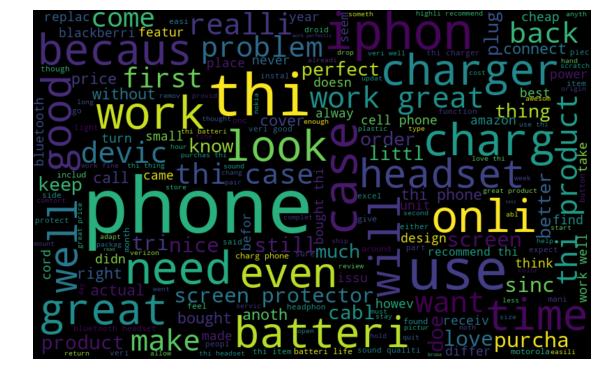

In [21]:
all_words = ' '.join([text for text in combi['tidy_reviews']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

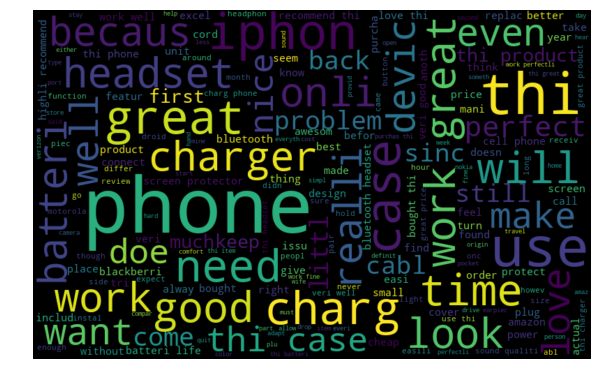

In [22]:
normal_words=' '.join([text for text in combi['tidy_reviews'][combi['label']==0]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

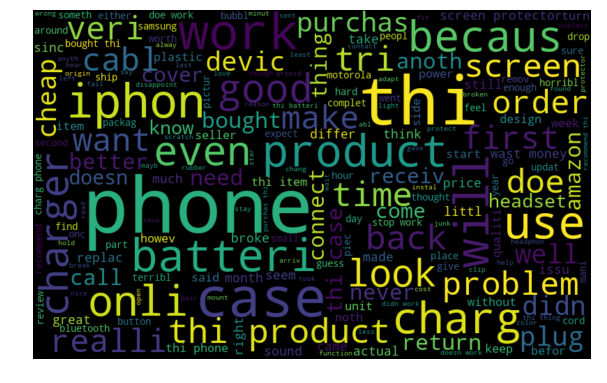

In [23]:
negative_words=' '.join([text for text in combi['tidy_reviews'][combi['label']==1]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [24]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow=bow_vectorizer.fit_transform(combi['tidy_reviews'])
bow.shape

(15770, 1000)

In [25]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_reviews'])
tfidf.shape

(15770, 1000)

In [104]:
tokenized_reviews = combi['tidy_reviews'].apply(lambda x: x.split()) #tokenizing
model_w2v = gensim.models.Word2Vec(
            tokenized_reviews,
            size=200, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers = 8, # no. of cores
            seed = 34)

model_w2v.train(tokenized_reviews, total_examples= len(combi['tidy_reviews']), epochs = 20)

(12682280, 15366540)

In [105]:
model_w2v.wv.most_similar(positive='love')

[('saylov', 0.5983400940895081),
 ('greati', 0.573854386806488),
 ('daugther', 0.5732786059379578),
 ('itawesom', 0.5559380650520325),
 ('fanat', 0.5520914793014526),
 ('pefect', 0.5348299145698547),
 ('aunt', 0.5343494415283203),
 ('onelov', 0.5333427786827087),
 ('cutest', 0.5302391648292542),
 ('fave', 0.5278398990631104)]

In [106]:
len(model_w2v['love'])

200

In [107]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1,size))
    count = 0.
    for word in tokens:
        try:
            vec +=model_w2v[word].reshape((1,size))
            count +=1.
        except KeyError: # handling the case where the token is not in vocabulary 
                        continue
    if count !=0:
        vec /=count
    return vec

In [108]:
wordvec_arrays = np.zeros((len(tokenized_reviews), 200))
for i in range (len(tokenized_reviews)):
    wordvec_arrays[i,:] = word_vector(tokenized_reviews[i], 200)
    wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

(15770, 200)

In [109]:
from tqdm import tqdm
tqdm.pandas(desc = 'progress-bar')
from gensim.models.doc2vec import LabeledSentence

In [110]:
def add_label(rvw):
    output = []
    for i, s in zip(rvw.index, rvw):
        output.append(LabeledSentence(s, ['reviews_' + str(i)]))
    return output
labeled_reviews = add_label(tokenized_reviews)

In [111]:
labeled_reviews[:5]

[LabeledSentence(words=['these', 'sticker', 'work', 'like', 'review', 'say', 'they', 'they', 'stick', 'great', 'they', 'stay', 'phone', 'they', 'super', 'stylish', 'share', 'them', 'with', 'sister', 'realli', 'great', 'product'], tags=['reviews_0']),
 LabeledSentence(words=['these', 'awesom', 'make', 'phone', 'look', 'stylish', 'have', 'onli', 'use', 'have', 'almost', 'year', 'believ', 'that', 'year', 'great', 'qualiti', 'love', 'love', 'love'], tags=['reviews_1']),
 LabeledSentence(words=['awesom', 'stay', 'look', 'great', 'use', 'multipl', 'appl', 'product', 'especi', 'have', 'nail', 'help', 'have', 'elev', 'leopard', 'home', 'button', 'sticker', 'iphon'], tags=['reviews_2']),
 LabeledSentence(words=['came', 'just', 'describ', 'doesn', 'come', 'unstuck', 'cute', 'peopl', 'where', 'them', 'from', 'great', 'when', 'drive', 'best', 'thing', 'ever'], tags=['reviews_3']),
 LabeledSentence(words=['good', 'case', 'solid', 'build', 'protect', 'phone', 'around', 'with', 'good', 'access', 'but

In [112]:
model_d2v = gensim.models.Doc2Vec(dm = 1, # for 'distributed memory' model
                                 dm_mean=1, # for using mean of the context word vectors
                                 size=200, # no. of desired features
                                 window=5, # width of the context window
                                 negative=7, # if > 0 then negative sampling will be used
                                 min_count=5, # ignores all words with total frequency less than 2
                                 workers=3, # no. of cores
                                 alpha=0.1, #learning rate
                                 seed = 23)

model_d2v.build_vocab([i for i in tqdm(labeled_reviews)])

model_d2v.train(labeled_reviews, total_examples= len(combi['tidy_reviews']), epochs=15)


C:\Users\Krishna.Priya\anaconda3\lib\site-packages\gensim\models\doc2vec.py:366: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
100%|███████████████████████████████████████████████████████████████████████| 15770/15770 [00:00<00:00, 3908768.12it/s]


In [113]:
docvec_arrays = np.zeros((len(tokenized_reviews), 200)) 
for i in range(len(combi)):
    docvec_arrays[i,:] = model_d2v.docvecs[i].reshape((1,200))    

docvec_df = pd.DataFrame(docvec_arrays) 
docvec_df.shape

(15770, 200)

In [114]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [122]:
# We will first try to fit the logistic regression model on the Bag-of_Words (BoW) features.

# Extracting train and test BoW features

train_bow = bow[:15000,:]
test_bow = bow[15000:,:]

# splitting data into training and validation set

xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'], random_state=42, test_size=0.2, stratify=train['label'])

lreg = LogisticRegression() 

# training the model

lreg.fit(xtrain_bow, ytrain) 

# predicting on the validation set 

prediction = lreg.predict_proba(xvalid_bow)

# if prediction is greater than or equal to 0.3 then 1 else 0

prediction_int = prediction[:,1] >=0.3
prediction_int = prediction_int.astype(np.int)

# calculating f1 score for the validation set

f1_score(yvalid, prediction_int)

C:\Users\Krishna.Priya\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8447380840018878

In [117]:
train_tfidf = tfidf[:15000,:]
test_tfidf = tfidf[15000:,:] 

xtrain_tfidf, xvalid_tfidf, ytrain, yvalid = train_test_split(train_tfidf, train['label'], random_state=42, test_size=0.2, stratify=train['label'])

lreg.fit(xtrain_tfidf, ytrain) 

prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 

f1_score(yvalid, prediction_int)

C:\Users\Krishna.Priya\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8502283105022831

In [118]:
train_w2v = wordvec_df.iloc[:15000,:]
test_w2v = wordvec_df.iloc[15000:,:] 

xtrain_w2v, xvalid_w2v, ytrain, yvalid = train_test_split(train_w2v, train['label'], random_state=42, test_size=0.2, stratify=train['label'])

lreg.fit(xtrain_w2v, ytrain)

prediction = lreg.predict_proba(xvalid_w2v)
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 

f1_score(yvalid, prediction_int)

C:\Users\Krishna.Priya\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8276181649675626

In [119]:
train_d2v = docvec_df.iloc[:15000,:]
test_d2v = docvec_df.iloc[15000:,:]

xtrain_d2v, xvalid_d2v, ytrain, yvalid = train_test_split(train_d2v, train['label'], random_state=42, test_size=0.2, stratify=train['label'])

lreg.fit(xtrain_d2v, ytrain)

prediction = lreg.predict_proba(xvalid_d2v)
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 

f1_score(yvalid, prediction_int)

C:\Users\Krishna.Priya\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.5053250091810504

In [120]:
from sklearn import svm

In [121]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_bow, ytrain)

prediction = svc.predict_proba(xvalid_bow)
prediction_int = prediction[:,1] >=0.3
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int)

0.8280313508529276

In [123]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_tfidf, ytrain)

prediction = svc.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >=0.3
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int)

0.8566001899335233

In [124]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_w2v, ytrain)

prediction = svc.predict_proba(xvalid_w2v)
prediction_int = prediction[:,1] >=0.3
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int)

0.8323156411460779

In [125]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_d2v, ytrain)

prediction = svc.predict_proba(xvalid_d2v)
prediction_int = prediction[:,1] >=0.3
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int)

0.48825453464168894

In [126]:
from sklearn.ensemble import RandomForestClassifier

In [127]:
rf = RandomForestClassifier(n_estimators=1000, random_state=10).fit(xtrain_bow, ytrain)
prediction = rf.predict(xvalid_bow)

f1_score(yvalid, prediction)

0.8324324324324326

In [128]:
rf = RandomForestClassifier(n_estimators=1000, random_state=10).fit(xtrain_tfidf, ytrain)
prediction = rf.predict(xvalid_tfidf)

f1_score(yvalid, prediction)

0.8293736501079914

In [129]:
rf = RandomForestClassifier(n_estimators=1000, random_state=10).fit(xtrain_w2v, ytrain)
prediction = rf.predict(xvalid_w2v)

f1_score(yvalid, prediction)

0.7732724157624216

In [130]:
from xgboost import XGBClassifier

In [131]:
xgb_model = XGBClassifier(max_depth=10, n_estimators=1000). fit(xtrain_bow, ytrain)
prediction = xgb_model.predict(xvalid_bow)

f1_score(yvalid, prediction)

0.8502869066249348

In [132]:
xgb_model = XGBClassifier(max_depth=10, n_estimators=1000). fit(xtrain_tfidf, ytrain)
prediction = xgb_model.predict(xvalid_tfidf)

f1_score(yvalid, prediction)

0.8491155046826222

In [133]:
xgb_model = XGBClassifier(max_depth=10, n_estimators=1000). fit(xtrain_w2v, ytrain)
prediction = xgb_model.predict(xvalid_w2v)

f1_score(yvalid, prediction)

0.826525198938992

In [144]:
# Now let’s make predictions for the test dataset and create a submission file.

test_pred = lreg.predict_proba(test_tfidf)
test_pred_int = test_pred[:,1] >=0.25
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['reviewer_name','review_date','rating','upvote','reviews','label']]

# writing data to a CSV file.

submission.to_csv('sub_lreg_tfidf.csv', index=False)

In [26]:
# Again let’s make predictions for the test dataset and create another submission file.

# test_pred = svc.predict_proba(test_tfidf)
# test_pred_int = test_pred[:,1] >=0.3
# test_pred_int = test_pred_int.astype(np.int)
# test['label'] = test_pred_int

# submission = test[['reviewer_name','review_date','rating','upvote','reviews','label']]
# submission.to_csv('sub_svm_tfidf.csv', index=False)

In [27]:
# Let’s make predictions for the test dataset and create another submission file.

# test_pred = rf.predict(test_bow)
# test['label'] = test_pred
# submission = test[['reviewer_name','review_date','rating','upvote','reviews','label']]
# submission.to_csv('sub_rf_bow.csv', index=False)

In [28]:
# test_pred = xgb_model.predict(test_bow)
# test['label'] = test_pred
# submission = test[['reviewer_name','review_date','rating','upvote','reviews','label']]
# submission.to_csv('sub_xgb_bow.csv', index=False)

In [147]:
test_pred = xgb_model.predict(test_w2v)
test['label'] = test_pred
submission = test[['reviewer_name','review_date','rating','upvote','reviews','label']]
submission.to_csv('sub_xgb_w2v.csv', index=False)

In [2]:
data  = pd.read_csv('sub_xgb_w2v.csv') 

In [14]:
data

,reviewer_name,review_date,rating,upvote,reviews,label
0,dipakkumar nayak,May 5 2019,4.0,0.0,sometimes it don't work properly. ex : it shows the input amount twice in a monthly budget while I have inputed once & sometimes the selected expenses were not in the final expense sheet,1
1,Nishant Mamoria,March 13 2019,1.0,0.0,"not user friendly.... There are some entry during ""add expense"" option which are same for all expenses ( like details of project and donor) which should be selected by default after login. which a...",0
2,Mustafa kiranawala,February 27 2019,5.0,2.0,There are a few bugs in the app but I got timely support from happay team. Rating is for Happay team.,1
3,rakesh chakilam,March 17 2019,2.0,1.0,This(Happay) card for name sake it is food card. but its not accepting at any merchant stores/sites like Swiggy Zomato Uber eats..etc please provide your services for that also.else its no use of...,0
4,SATHIYARAJAN p,April 20 2019,5.0,2.0,Easley to update on my business expenses with out delay as well asnot missed expenses,0
5,Tech Plus,May 6 2019,4.0,0.0,best application but jst add the adjustment. amount option /ledger balance. option,0
6,rahul kanwal,April 21 2019,1.0,9.0,one star is also enough such company has no tested as per user behalf all select option is absent while selecting .... no option of rename report everytime ask for update but no new features added...,1
7,Madhava Pongoru,April 11 2019,1.0,3.0,i am no longer associated with Sunera Technologies. Hence i am uninstalling it. No security in these type of organisations.,0
8,Gowtham Raj,March 29 2019,3.0,12.0,How times I'm going update this app yar.. Dear app owner plz stop this nonsense every time ...🙏,1
9,Ramchandra kumar,April 30 2019,5.0,0.0,Best app for salea person...to feed all financial expenses data.,0


In [18]:
data['reviews']=data['reviews'].astype(str)

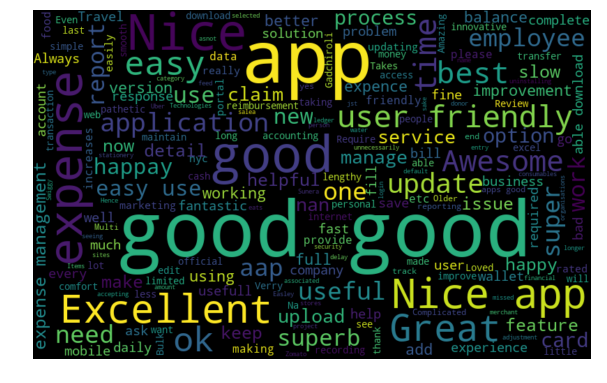

In [19]:
normal_words=' '.join([text for text in data['reviews'][data['label']==0]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

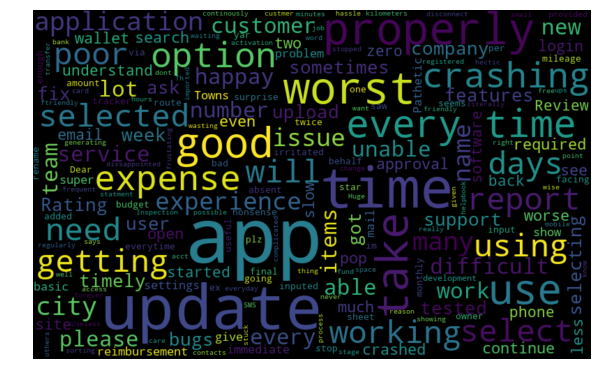

In [21]:
negative_words=' '.join([text for text in data['reviews'][data['label']==1]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()